In [75]:
pip install xgboost

In [76]:
import xgboost as xgb
print(xgb.__version__)

2.1.0


In [77]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from xgboost import XGBClassifier

In [78]:
df = pd.read_csv("C:/Users/singh/Desktop/TIP_2/fraudTest.csv")   #C:/Users/singh/Downloads/fraudTrain.csv 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [79]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [80]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [81]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [82]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time  ##TRAIN
#df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
#df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
#df.info()


# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'  ## TEST
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Pre-Processing

In [83]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [84]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [85]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')  #format='%d-%m-%Y %H:%M').dt.time

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [86]:
df.dtypes

trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object

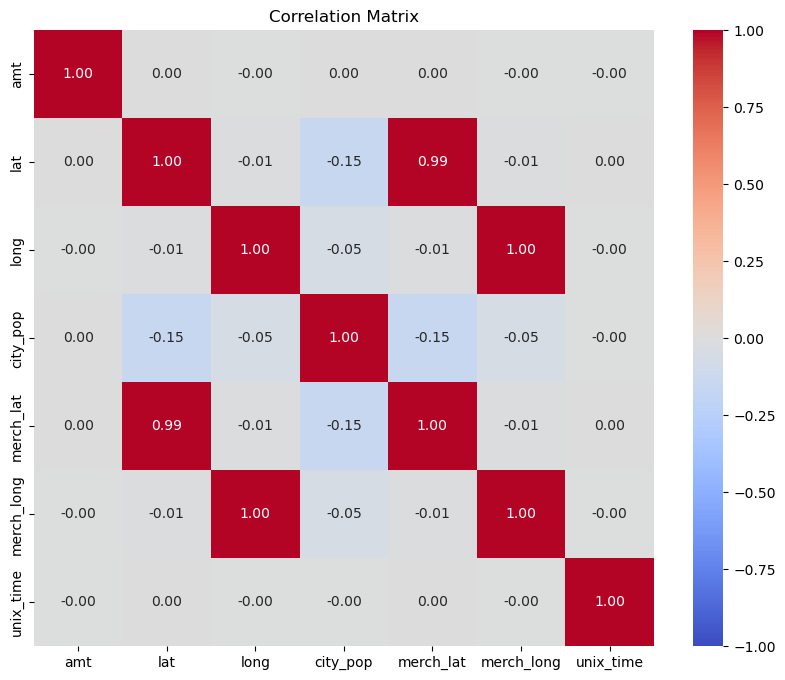

In [87]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

1. Transaction Frequency Features

In [88]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64

In [89]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

         cc_num trans_date  transactions_per_day
0  2.291160e+15 2020-06-21                    21
1  3.573030e+15 2020-06-21                    36
2  3.598220e+15 2020-06-21                    45
3  3.591920e+15 2020-06-21                    29
4  3.526830e+15 2020-06-21                    29


In [90]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

         cc_num  Week  transaction_per_week
0  2.291160e+15    25                     2
1  3.573030e+15    25                     4
2  3.598220e+15    25                     3
3  3.591920e+15    25                     3
4  3.526830e+15    25                     4


In [91]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
6      30058
7      85848
8      88759
9      69533
10     69348
11     72635
12    139538
dtype: int64


In [92]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

         cc_num trans_date  transactions_per_month
0  2.291160e+15 2020-06-21                      34
1  3.573030e+15 2020-06-21                      49
2  3.598220e+15 2020-06-21                      55
3  3.591920e+15 2020-06-21                      33
4  3.526830e+15 2020-06-21                      56


In [93]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

Exception ignored in: <function ZipFile.__del__ at 0x000001784C3A85E0>
Traceback (most recent call last):
  File "c:\Users\singh\anaconda3\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "c:\Users\singh\anaconda3\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x000001784C3A85E0>
Traceback (most recent call last):
  File "c:\Users\singh\anaconda3\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "c:\Users\singh\anaconda3\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


2. User Transaction Behavior

In [94]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

## 3. User-Based Features: Age and Gender

3.1 Calculate age of user based on DOB and transation date

In [95]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      46.390496
median    44.000000
min       15.000000
max       96.000000
Name: age, dtype: float64

3.2 Convert gender into binary values

In [96]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)


 The number of cutomers based on age is:
gender
F    304886
M    250833
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------


## 4. Fraud Transaction Analysis

4.1 Calculate fraud ratio using fraudulent transactions and total transactions

In [97]:
# Calculate fraudulent transactions per user
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Merge fraud_ratio into the original dataset
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

## 5. Geography Analysis

5.1 Distance calculation using Haversine calculation

In [98]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

5.2 Categorize type of cities based on the population

In [99]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'pop_category'
df['pop_cat'] = df['city_pop'].apply(categorize_population)

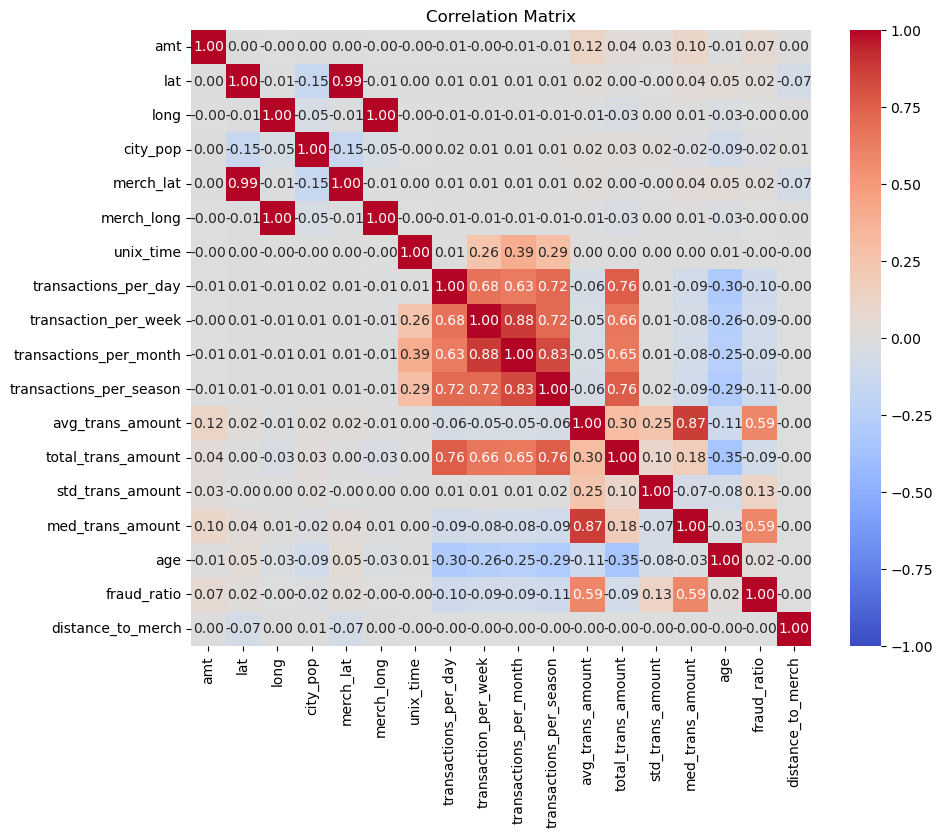

In [100]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'transactions_per_day', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'med_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Feature Selection

6.1 Chi-Square Test for Categorical Feature Independence with Fraud

In [101]:
#List of categorical columns to test
categorical_cols = ['Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'pop_cat']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud:\n", results_df)

Chi-square test results for categorical features and is_fraud:
                    Feature          Chi2        P-value
0                     Week    453.197099   2.748520e-78
1     transaction_per_week   1077.275234  5.375051e-161
2   transactions_per_month   8758.796067   0.000000e+00
3  transactions_per_season  11943.083421   0.000000e+00
4                  pop_cat     77.751160   1.307826e-17


6.2 Correlation Coefficient (Numerical Features)

In [102]:
# Compute Pearson correlation coefficient
correlation = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
                  'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
                  'distance_to_merch', 'is_fraud']].corr()['is_fraud']

print("Pearson correlation coefficients:")
print(correlation)

Pearson correlation coefficients:
transactions_per_day   -0.026043
avg_trans_amount        0.180301
total_trans_amount     -0.026285
med_trans_amount        0.180225
std_trans_amount        0.039000
age                     0.007334
fraud_ratio             0.307568
distance_to_merch       0.000233
is_fraud                1.000000
Name: is_fraud, dtype: float64


In [103]:
#Assuming df is your dataset with features and 'is_fraud' as the target
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
        'distance_to_merch']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []  # Initialize an empty list to store selected features
accuracies = []          # Initialize an empty list to store accuracies

# Start a loop to select features one by one until all features are selected
while len(selected_features) < len(X.columns):
    max_acc = -1         # Initialize maximum accuracy to a very low value
    best_feature = None  # Initialize variable to store the best feature

    # Iterate through each feature in X.columns
    for feature in X.columns:
        if feature not in selected_features:  # Check if the feature is not already selected
            current_features = selected_features + [feature]  # Add the feature to the current selected features
            X_train_subset = X_train[current_features]       # Subset the training data with current features
            X_test_subset = X_test[current_features]         # Subset the testing data with current features

            # Initialize and train a logistic regression model
            clf = LogisticRegression(max_iter=1000, random_state=42)
            clf.fit(X_train_subset, y_train)
            y_pred = clf.predict(X_test_subset)  # Make predictions on the test data

            accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of predictions

            # Check if current accuracy is better than previous maximum accuracy
            if accuracy > max_acc:
                max_acc = accuracy  # Update maximum accuracy
                best_feature = feature  # Update best feature

    # If adding the best feature improves accuracy, add it to selected features and record accuracy
    if max_acc > max(accuracies, default=0):
        selected_features.append(best_feature)
        accuracies.append(max_acc)
    else:
        break  # Exit the loop if no improvement in accuracy

# Print selected features and their corresponding accuracies
print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['avg_trans_amount']
Accuracies: [0.9964550493054056]


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your dataset with features and 'is_fraud' as the target
# Replace df with your actual dataset
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
        'distance_to_merch']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = list(X.columns)
accuracies = []

while len(selected_features) > 0:
    max_acc = -1
    worst_feature = None

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]

        clf = LogisticRegression(max_iter=1000, random_state=42)
        clf.fit(X_train_subset, y_train)
        y_pred = clf.predict(X_test_subset)

        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > max_acc:
            max_acc = accuracy
            worst_feature = feature

    if max_acc > max(accuracies, default=0):
        selected_features.remove(worst_feature)
        accuracies.append(max_acc)
    else:
        break

print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['transactions_per_day', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']
Accuracies: [0.9964550493054056]


7. Resampling dataset

In [105]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['pop_cat'] = label_encoder.fit_transform(df['pop_cat'])

In [106]:
# Drop irrelevant or personally identifiable information (PII) columns
df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "job"])

# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [107]:
# Step 3: Split the data into features (X) and target (y)
#X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with your target column name if different
#y = df['is_fraud']  # Replace 'is_fraud' with your target column name if different

# Step 4: Apply RandomUnderSampler to balance the dataset
#rus = RandomUnderSampler(random_state=42)
#X_under, y_under = rus.fit_resample(X, y)

# Create the new dataset df_under from the resampled data
#df_under = pd.DataFrame(X_under, columns=X.columns)
#df_under['is_fraud'] = y_under

# Check the balance of the resampled data
#print(y_under.value_counts())
#sns.countplot(x=y_under)

## Scaling

In [113]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_under is the balanced dataset
# Step 1: Split the balanced data into features (X) and target (y)


X = df_under.drop(columns=['is_fraud'])
y = df_under['is_fraud']
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Load the previously saved model
best_xgb = joblib.load('best_xgb_model.jobLib')  # Replace with your actual model filename
# Step 4: Make predictions on the scaled test data
y_pred = best_xgb.predict(X_test_scaled)
# Print the classification report
print("Classification Report on the test dataset:")
print(classification_report(y_test, y_pred))
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix on the test dataset:")
print(conf_matrix)


Classification Report on the test dataset:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       452
           1       0.99      0.86      0.92       406

    accuracy                           0.93       858
   macro avg       0.94      0.92      0.93       858
weighted avg       0.93      0.93      0.93       858


Confusion Matrix on the test dataset:
[[448   4]
 [ 58 348]]


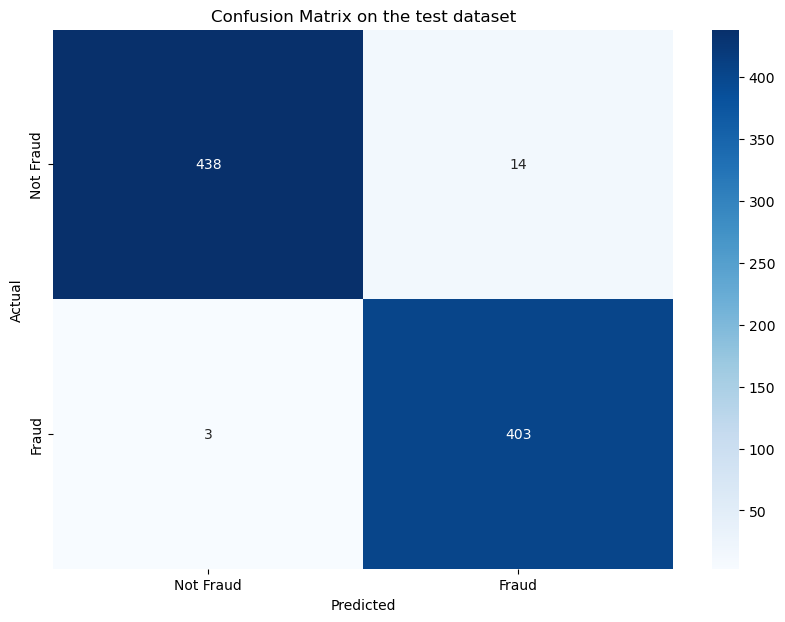


Model accuracy on the test dataset: 0.9801864801864801


In [109]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on the test dataset')
plt.show()
# Print the accuracy of the model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print("\nModel accuracy on the test dataset:", accuracy)